In [191]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import warnings

np.set_printoptions(precision=3, suppress=True)
warnings.filterwarnings("ignore")

print(tf.__version__)

2.7.0


In [192]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(
    url, names=column_names, na_values='?',
    comment='\t', sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [193]:
print(dataset.info())
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB
None
              MPG   Cylinders  Displacement  Horsepower       Weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.0

In [194]:
dataset.isna().sum()
dataset = dataset.dropna()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [195]:
# One Hot Encoding
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [196]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
print(train_dataset.shape, test_dataset.shape)

# Scikit Learn Alternative
# ============
# from sklearn.model_selection import train_test_split
# training_dataset, test_dataset = train_test_split(dataset, train_size=0.8, random_state=0, shuffle=True)

(314, 10) (78, 10)


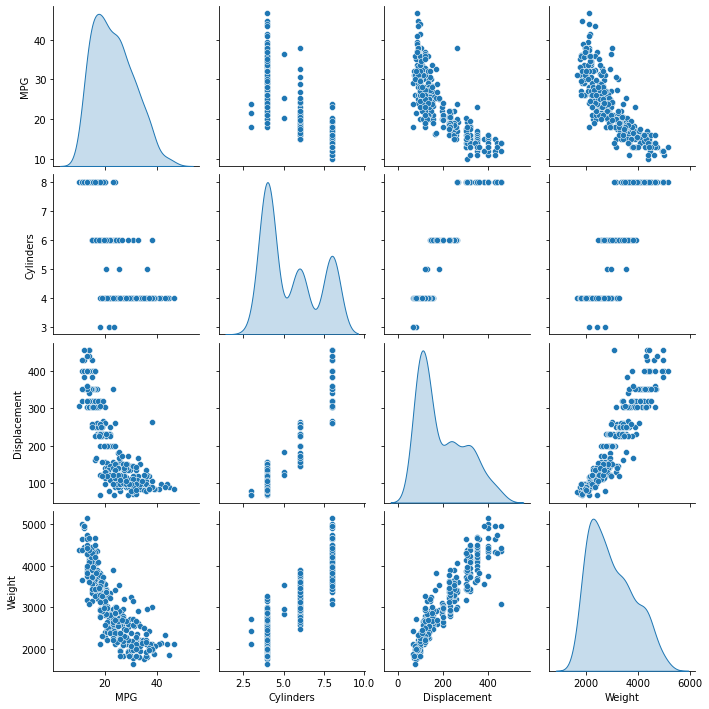

In [197]:
sns.pairplot(
    data=train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']],
    diag_kind='kde')

In [198]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [199]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [200]:
train_dataset.describe().T[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [201]:
normalizer = tf.keras.layers.Normalization(axis=-1) # performs x-mean / std
normalizer.adapt(np.array(train_features)) # calcs mean and var
print(normalizer.mean.numpy())
print(normalizer.variance.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]
[[     2.88   10850.413   1446.699 709896.75       7.755     13.467
       0.147      0.158      0.235]]


In [202]:
first = np.array(train_features[:1])
with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


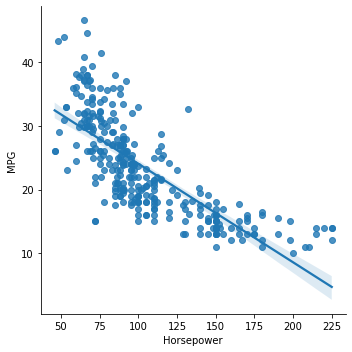

In [203]:
sns.lmplot(data=train_dataset, x="Horsepower", y="MPG")

In [204]:
# create single-variable model h(Horsepower) = MPG
horsepower_np = np.array(train_features['Horsepower'])
horsepower_norm = tf.keras.layers.Normalization(input_shape=(1,), axis=None) # None normalizes every element
horsepower_norm.adapt(horsepower_np)

horsepower_model = tf.keras.Sequential([
    horsepower_norm,
    tf.keras.layers.Dense(1)
])

horsepower_model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_40 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_25 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [205]:
horsepower_model.predict(horsepower_np[:10])
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
    #metrics=[tf.keras.metrics.Accuracy()]
)

In [206]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    verbose=0,
    validation_split = 0.2
)

CPU times: user 2.2 s, sys: 185 ms, total: 2.39 s
Wall time: 2.1 s


In [207]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.812690,4.203448,95
96,3.803894,4.185628,96
97,3.802145,4.189831,97
98,3.804410,4.184714,98
99,3.805519,4.182248,99


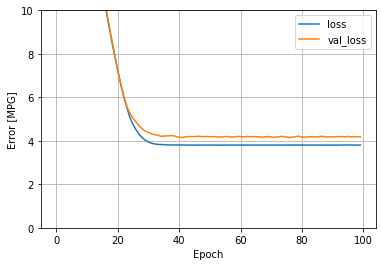

In [208]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

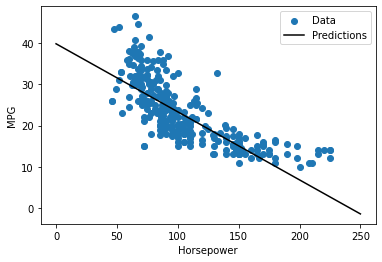

In [209]:
test_results = {}
test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0
)

x = tf.linspace(0., 250., 251)
y = horsepower_model.predict(x)

def plot_horsepower(x, y):
    plt.scatter(train_features['Horsepower'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()

plot_horsepower(x, y)

In [210]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(1)
])

linear_model.predict(train_features[:10])

array([[ 0.904],
       [ 0.407],
       [ 0.85 ],
       [-0.674],
       [-1.158],
       [-0.331],
       [-1.307],
       [-0.748],
       [ 0.459],
       [ 0.324]], dtype=float32)

In [211]:
# linear_model.weights -> weights
print(linear_model.layers[1].kernel.shape) # same weights

linear_model.compile(
    optimizer=tf.optimizers.SGD(0.1),
    loss='mean_absolute_error'
)

(9, 1)


In [212]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 2.29 s, sys: 190 ms, total: 2.48 s
Wall time: 2.21 s


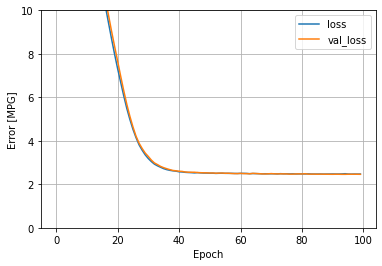

In [213]:
plot_loss(history)

In [214]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [215]:
# define a DNN
def build_and_compile_model(norm):
    model = tf.keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(
        loss='mean_absolute_error',
        optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [216]:
dnn_horsepower_model = build_and_compile_model(horsepower_norm)
dnn_horsepower_model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_40 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_27 (Dense)            (None, 64)                128       
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dense_29 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [217]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100
)

CPU times: user 2.65 s, sys: 323 ms, total: 2.97 s
Wall time: 2.43 s


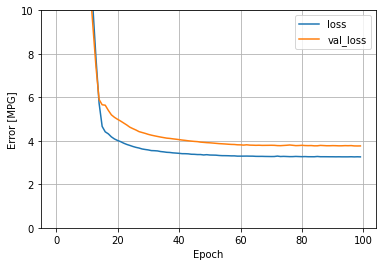

In [218]:
plot_loss(history)

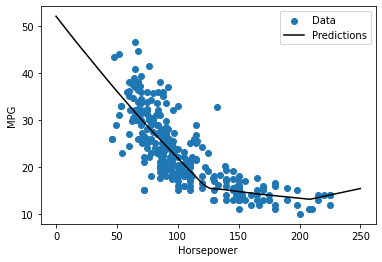

In [219]:
x = tf.linspace(0., 250., 251)
y = dnn_horsepower_model.predict(x)
plot_horsepower(x, y)

test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0)

In [220]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_39 (Normaliza  (None, 9)                19        
 tion)                                                           
                                                                 
 dense_30 (Dense)            (None, 64)                640       
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 dense_32 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [221]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 2.73 s, sys: 337 ms, total: 3.06 s
Wall time: 2.43 s


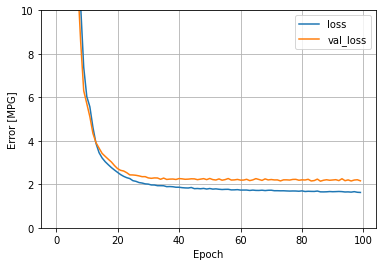

In [222]:
plot_loss(history)

In [224]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.661951
linear_model,2.498936
dnn_horsepower_model,2.942856
dnn_model,1.699893


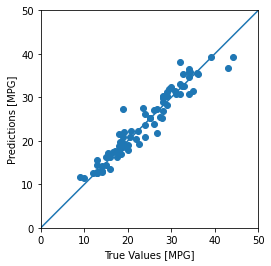

In [228]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)



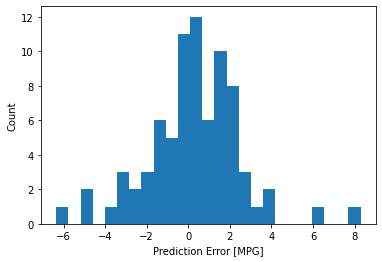

In [229]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [230]:
# save model
dnn_model.save('dnn_model')

2021-12-30 18:35:35.824703: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: dnn_model/assets


In [231]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [232]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.661951
linear_model,2.498936
dnn_horsepower_model,2.942856
dnn_model,1.699893
reloaded,1.699893
